In [1]:
import glob2 
import pandas as pd 

In [15]:
import numpy as np

In [20]:
import matplotlib.pyplot as plt 
%matplotlib inline

In [9]:
list_of_folders = glob2.glob("CAX_Characters_Train/**/*.jpg")

In [3]:
img_ids = []
img_labels =[]

for imgs in list_of_folders: 
    img_id = (imgs.split("/")[-1]).split(".")[0]
    img_label = imgs.split("/")[-2]
    img_ids.append(img_id)
    img_labels.append(img_label)
    

In [4]:
train_data = pd.DataFrame({"id": img_ids , "label": img_labels})

In [5]:
train_data.head()

,id,label
0,Cax_train4829,R2-D2
1,Cax_train4815,R2-D2
2,Cax_train4814,R2-D2
3,Cax_train4828,R2-D2
4,Cax_train4948,R2-D2


In [24]:
train_data.shape

(6694, 2)

In [6]:
import tensorflow as tf

/Users/vadiveld/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [7]:
from tensorflow.keras.preprocessing import image

In [17]:
train_image = []
issues_files = []
for val in list_of_folders:
    try:
        img = image.load_img(val,target_size=(400,400,3))
        img = image.img_to_array(img)
        img = img/255
        train_image.append(img)
    except:
        issues_files.append(val)

/Users/vadiveld/anaconda3/lib/python3.6/site-packages/PIL/Image.py:918: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


In [16]:
X = np.array(train_image)

In [27]:
troubled_soul = [ (file.split('/')[-1]).split('.')[0] for file in issues_files]

In [28]:
train_data_selected = train_data[~(train_data.id.isin(troubled_soul))] 

In [29]:
train_data_selected.shape

(6684, 2)

In [23]:
X.shape

(6684, 400, 400, 3)

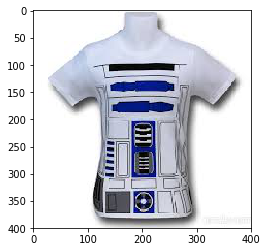

In [22]:
plt.imshow(X[0])

In [30]:
from sklearn.preprocessing import OneHotEncoder

In [39]:
from sklearn.model_selection import train_test_split

In [31]:
oneHotEncoder = OneHotEncoder()

In [34]:
train_data_selected_encoded,train_data_selected_label = train_data_selected['label'].factorize()

In [35]:
train_data_selected_encoded

array([ 0,  0,  0, ..., 41, 41, 41])

In [36]:
train_data_selected_encod = oneHotEncoder.fit_transform(train_data_selected_encoded.reshape(-1,1))

In [38]:
y = train_data_selected_encod.toarray()

In [62]:
y.shape

(6684, 42)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)


In [51]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.layers import Lambda, Flatten, Dense
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.layers import Layer
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Dropout, Flatten



In [63]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(400,400,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(42, activation='sigmoid'))

In [64]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 396, 396, 16)      1216      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 198, 198, 16)      0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 198, 198, 16)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 194, 194, 32)      12832     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 97, 97, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 97, 97, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 93, 93, 64)       

In [65]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=1, validation_data=(X_test, y_test), batch_size=64)

Train on 6015 samples, validate on 669 samples
1920/6015 [========>.....................] - ETA: 8:28 - loss: 3.6087 - accuracy: 0.0557

In [59]:
X_train.shape

(6015, 400, 400, 3)

In [61]:
y_train.shape

(6015, 42)